





# Exploratory Data Analysis on Movie Reviews

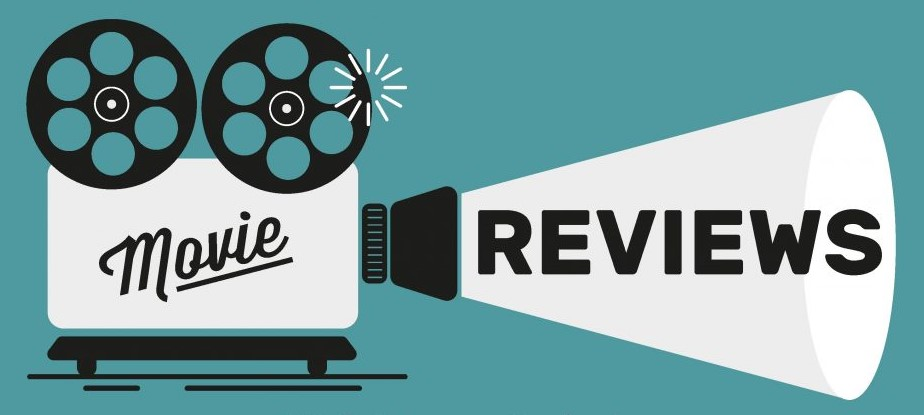

# Objective
* Use the movie reviews dataset to gain insights into the behaviors and preferences of the reviewers
* Analyze the movie reviews dataset and gain insights into factors that may influence the reviews.

# Table of Content
* Data Wrangling/Cleaning


* Genre/Category
   - Genre with Poor Ratings
   - Genre with Good Ratings
   - Percentage of Genre with Bad reviews


* Time
   * Runtime of Movies in Minutes Reviewed
   * Years Reveiws Were Taken
   * Years Movies Were Produced
   
   
* Conclusion


* Recommendation

# Introduction
The movie industry is a multi-billion dollar global enterprise that is constantly evolving. Movie studios and other organizations in the entertainment industry rely heavily on feedback from moviegoers and critics to make informed decisions about which movies to produce, market, and distribute.

This report presents the results of our analysis of a large movie reviews dataset containing over 320,000 annotated movie reviews in English. Our objective was to gain insights into the behaviors of the reviewers and to identify patterns and trends in the reviews that may be useful for industry professionals. The report presents our findings and provides recommendations based on the insights gained from the analysis.

In [1]:
# importing modules and configuration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', None)
pd.set_option("display.max_rows", None)

# Data Wrangling

In [2]:
# read files into pandas dataframe
IMDB_review = pd.read_csv('data\IMDB_dataset.csv')
IMDB_review.shape
print('The number of rows are '+str(IMDB_review.shape[0])+
      ' and the number of columns are '+str(IMDB_review.shape[1]))

The number of rows are 320747 and the number of columns are 16


In [3]:
# Hete i dropped duplicates, changed the index column,
#dropped some column and renamed each column respectively
IMDB_review=IMDB_review.drop_duplicates(['Greek title'])
IMDB_review.index=IMDB_review['original title']
IMDB_review= IMDB_review.drop(columns=['review','url','Greek title', 'author', 'id number','original title','label' ])
IMDB_review= IMDB_review.rename(columns=
                               {'category':'Category',
                               'director/creator':'Creator',
                                'movie lenght':'Movie Length',
                                'movie date':'Movie Date',
                                'review date':'Review Date',
                               'review title':'Review Title',
                                'mean of stars':'Mean Of Stars From The Reviews',
                                'full reviews average stars':'Rating of the Movie',})

In [4]:
IMDB_review.head(5)

,Category,Creator,Movie Length,Movie Date,Review Date,Review Title,Mean Of Stars From The Reviews,number of reviews,Rating of the Movie
original title,,,,,,,,,
Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,8 April 2012,"For those who don't mind a slow pacing to their movies, and can digest a theme involving supernatural elements, Lekin is a very good watch.",9.16,6,7.5
The Lemon Sisters,Comedy,Joyce Chopra,1 hour 33 minutes,1989,7 December 2006,Stop! In the name of love,9.50,2,5.0
Leona Helmsley: The Queen of Mean,Drama,Richard Michaels,1 hour 34 minutes,1990,24 October 2019,Movie is not playing,7.13,15,6.6
Yue gui xing dong,Action,Benny Wong,1 hour 27 minutes,1990,29 July 2005,Much-better-than-average Hong Kong action-comedy...but still uneven!,8.00,1,5.8
Her Wicked Ways,Drama,Richard Michaels,1 hour 35 minutes,1991,28 April 2021,Great movie!,8.50,2,5.5


In [5]:
print('After Cleaning the data, \nThe number of rows are now '
      +str(IMDB_review.shape[0])+ ' and the number of columns are '+str(IMDB_review.shape[1]))

After Cleaning the data, 
The number of rows are now 23485 and the number of columns are 9


In [6]:
# This is the info of the data
IMDB_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23485 entries, Lekin... to Mise à sac
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        23485 non-null  object 
 1   Creator                         23485 non-null  object 
 2   Movie Length                    22334 non-null  object 
 3   Movie Date                      23485 non-null  object 
 4   Review Date                     23485 non-null  object 
 5   Review Title                    23485 non-null  object 
 6   Mean Of Stars From The Reviews  23485 non-null  float64
 7   number of reviews               23485 non-null  int64  
 8   Rating of the Movie             23485 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.8+ MB


----------------------------------------------------

# Genre/ Category
 In this section, I sought to investigate whether the categories or genre column in the movie reviews dataset had an effect on the ratings given by the reviewers. To do this, we performed a bivariate analysis of the categories/genre column against the ratings column using various statistical and visual techniques.
 
This section is divided into two parts, where we analyze the impact of categories/genres on the review ratings given by reviewers. The first part analyzes categories/genres with bad review ratings (ratings less than or equal to 5), while the second part focuses on categories/genres with good review ratings (ratings greater than 5).

We will investigate the influence of categories/genres on the review ratings for each of these two groups separately. This will help us to gain a deeper understanding of the relationships between categories/genres and review ratings. We will also attempt to answer some key questions related to these relationships.

We will also try to investigate the category thats more susceptible to bad reviews and why they are.

In [7]:
# This is all the Genre and the number of movies in that genres
IMDB_review['Category'].value_counts()

Drama          5321
Comedy         4908
Action         2826
Animation      2656
Crime          1368
Documentary    1296
Adult           913
Adventure       774
Short           770
Horror          547
Thriller        429
Biography       417
Family          376
Mystery         136
Sci-Fi          134
Western         134
Romance         120
Fantasy         110
Musical          82
Music            66
War              25
History          22
Talk-Show        21
Game-Show        18
News              7
Reality-TV        5
Sport             4
Name: Category, dtype: int64

In [8]:
bad=IMDB_review[IMDB_review['Rating of the Movie']<=5]
good=IMDB_review[IMDB_review['Rating of the Movie']>5]

###  Genre With Poor Ratings

In [9]:
# This is the movies and their genre that have a general review rating
#that is less than or equal to 5
bad['Category'].value_counts()

Action         1022
Comedy          881
Drama           637
Animation       452
Horror          347
Crime           200
Thriller        174
Adventure       146
Adult           100
Sci-Fi           75
Short            70
Family           52
Documentary      42
Mystery          41
Romance          35
Western          34
Fantasy          30
Biography        16
Musical          14
Talk-Show         6
Music             4
War               2
News              2
History           1
Reality-TV        1
Name: Category, dtype: int64

Text(0.5, 1.0, 'Graphical View of Genre Counts with Ratings Less than  or Equal to 5.0')

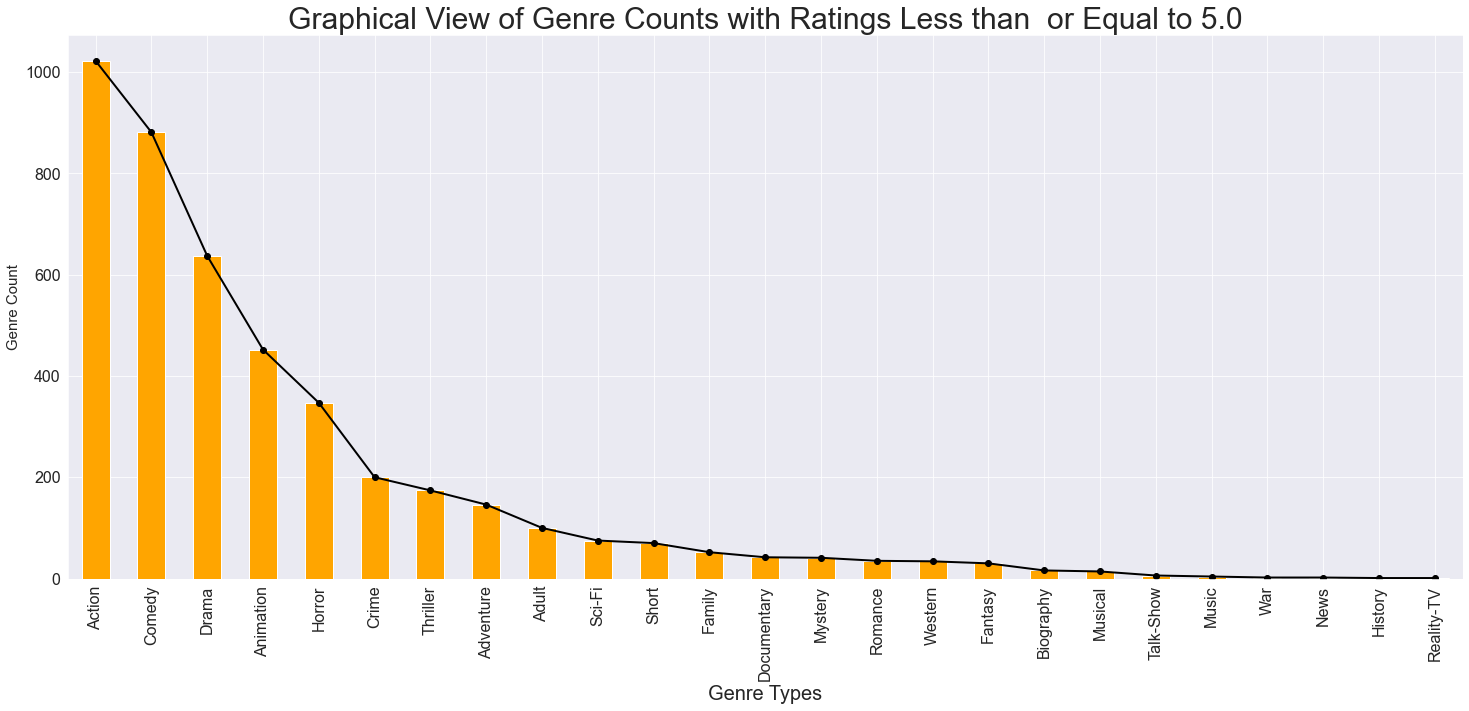

In [31]:
bad['Category'].value_counts().plot(kind='bar',
                                    figsize=(25,10), 
                                    color='orange')
bad['Category'].value_counts().plot(kind='line', 
                                    figsize=(25,10), color='black',
                                    marker='o', linewidth=2)

plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)

plt.xlabel('Genre Types',fontsize=15+5)
plt.ylabel('Genre Count',fontsize=15)
plt.title("Graphical View of Genre Counts with Ratings Less than  or Equal to 5.0"
          ,fontsize=30)

In [11]:
# year each 'Action' genre under bad reviews were produced
bad[bad['Category']=='Action']['Movie Date'].value_counts().head(11)

1995    125
1996    122
1994    108
1997    105
1993     83
1998     82
1991     80
1992     69
1990     43
1999     40
1989     24
Name: Movie Date, dtype: int64

### Observation
* We can observe that the top three categories/genres with bad review ratings are Action, Comedy, and Drama, with counts of 1022, 881, and 637 respectively.

* We can also observe that genres such as Adventure, Adult, Sci-Fi, Short, and Family have relatively lower counts of bad review ratings. This may suggest that these genres have a lower chance of receiving bad review ratings compared to other genres.

* Additionally, we can observe that some categories/genres such as Music, War, News, History, and Reality-TV have only 1 or 2 counts of bad review ratings. This suggests that these categories/genres have a relatively lower sample size and may not be a significant indicator of the overall trend of bad review ratings.

Overall, these observations can be used to highlight the genres that have a higher likelihood of receiving bad review ratings, and may help in making informed decisions about movie production and distribution.

#### Question
* Why is 'Action' the highest in this list?

> Without further analysis, it is difficult to say why "Action" has the highest count of bad review ratings. It could be due to a number of factors, such as the quality of the movies in this category, the preferences of the reviewers, or the popularity of the action genre among movie-goers.

> From above, however, we can see that most of the movies in the "Action" genre were made in the 90s, this could potentially be a factor that could impact the review ratings. For example, viewers may have different expectations for movies made in different time periods, or there may have been certain trends or styles of filmmaking that were popular in the 90s that don't resonate with modern audiences. However, further analysis would be needed to determine whether there is a significant relationship between the release year and review ratings for movies in the "Action" genre.

###  Genre With Good Ratings

In [12]:
# This is the movies and their genre that have a general review rating
#that is greater than 5
good['Category'].value_counts()

Drama          4684
Comedy         4027
Animation      2204
Action         1804
Documentary    1254
Crime          1168
Adult           813
Short           700
Adventure       628
Biography       401
Family          324
Thriller        255
Horror          200
Western         100
Mystery          95
Romance          85
Fantasy          80
Musical          68
Music            62
Sci-Fi           59
War              23
History          21
Game-Show        18
Talk-Show        15
News              5
Sport             4
Reality-TV        4
Name: Category, dtype: int64

Text(0.5, 1.0, 'Graphical View of Genre Counts with\nRatings Greater than 5.0')

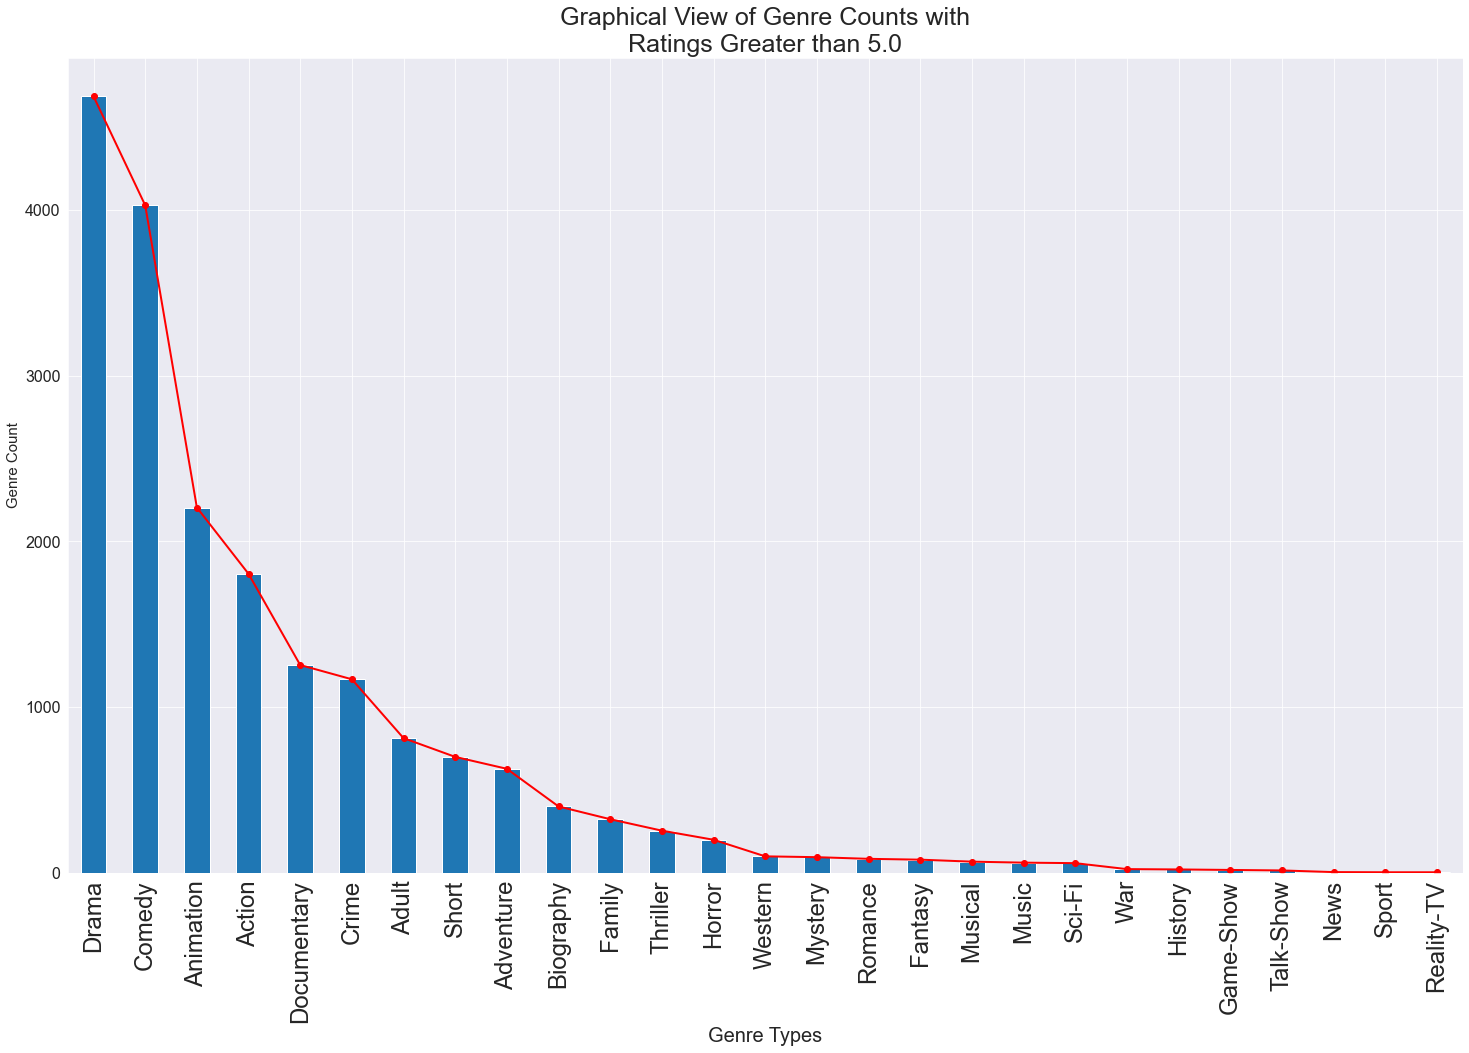

In [41]:
good['Category'].value_counts().plot(kind='bar', figsize=(25,15))
good['Category'].value_counts().plot(kind='line', figsize=(25,15),
                                     color='red', marker='o', linewidth=2)

plt.xticks(fontsize=24, rotation=90)
plt.yticks(fontsize=16)

plt.xlabel('Genre Types',fontsize=20)
plt.ylabel('Genre Count',fontsize=15)
plt.title("Graphical View of Genre Counts with\nRatings Greater than 5.0"
          ,fontsize=25)

#### Observation

* The most common genres for movies with good ratings are Drama, Comedy, and Animation. This suggests that these genres are generally well-received by audiences but more analysis on these will be needed.

* On the other hand, some genres, such as Sport, News, and Reality-TV, have relatively few movies with good ratings, which may suggest that these genres are less popular or less successful at capturing audiences' interest. 

* Additionally, we can observe that some genres, such as Adult and Short, have a relatively high number of movies with good ratings, despite being less common in the overall movie landscape

##### In this next section, we aim to conduct a further analysis of the percentage of each film category that received poor ratings.

In [14]:
#This shows the percent of each category that received poor ratings.
# For example 63% of all Horrow films had bad ratings
percentile_bad= (bad['Category'].value_counts()/IMDB_review['Category']
                 .value_counts())*100
percentile_bad
percentile_bad.sort_values(ascending=False)


Horror         63.436929
Sci-Fi         55.970149
Thriller       40.559441
Action         36.164190
Mystery        30.147059
Romance        29.166667
Talk-Show      28.571429
News           28.571429
Fantasy        27.272727
Western        25.373134
Reality-TV     20.000000
Adventure      18.863049
Comedy         17.950285
Musical        17.073171
Animation      17.018072
Crime          14.619883
Family         13.829787
Drama          11.971434
Adult          10.952903
Short           9.090909
War             8.000000
Music           6.060606
History         4.545455
Biography       3.836930
Documentary     3.240741
Game-Show            NaN
Sport                NaN
Name: Category, dtype: float64

Text(0.5, 1.0, 'Graphical View of Genre Counts in Percentages with  Bad ratings')

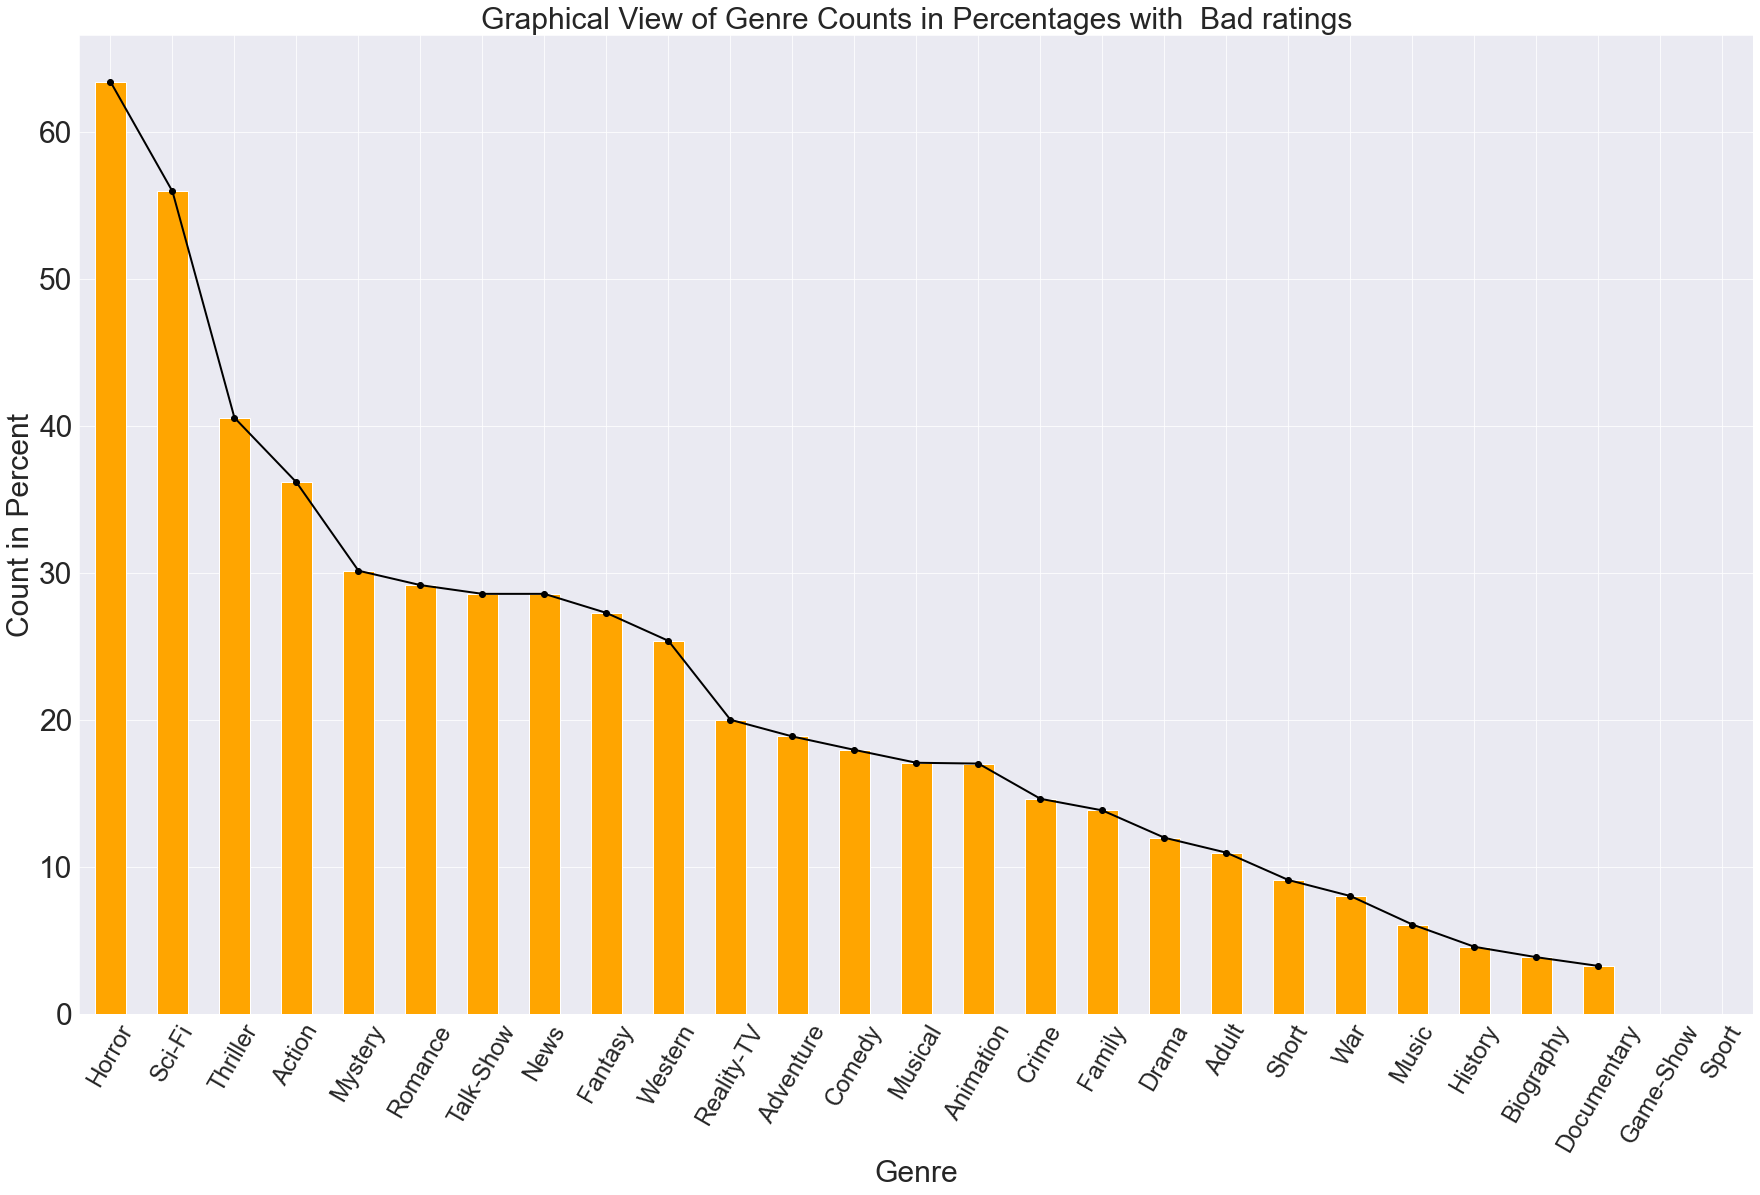

In [42]:
percentile_bad.sort_values(ascending=False).plot(kind='bar',
            figsize=(30,18), color='orange')
percentile_bad.sort_values(ascending=False).plot(kind='line',
            figsize=(30,18), color='black', marker='o', linewidth=2)

plt.xticks(fontsize=24, rotation=60)
plt.yticks(fontsize=30)
plt.xlabel('Genre',fontsize=30)
plt.ylabel('Count in Percent',fontsize=30)
plt.title("Graphical View of Genre Counts in Percentages with  Bad ratings"
        ,fontsize=30)

#### Observation
* We can observe that horror films received the highest percentage of bad reviews at 63.44%, followed by science fiction at 55.97%, and thriller at 40.56%. This could suggests that audiences and critics may have high expectations for these genres and are more critical of movies that do not meet those expectations.


* On the other hand, genres like documentary, biography, and history have the lowest percentages of bad reviews, with some even having 0%. This could indicate that movies in these genres are generally well-received by audiences and critics.


* It is also interesting to note that game-show and sport genres received 0% bad reviews, but this could be due to the fact that there are very few movies in these genres to begin with.

#### Question
* Why are horror films consistently receiving the highest percentage of bad reviews. Is it because they are more likely to be poorly made, or is it because horror films have a niche audience that tends to be more critical of the genre? 

> Based on the data, horror and sci-fi films consistently receive the highest percentage of bad reviews. It could be due to a combination of factors such as poor quality of films in these genres, the expectation of the audience, and the subjective nature of what constitutes a good horror or sci-fi movie. Additionally, these genres may attract a more critical audience, who have a higher expectation of what they consider to be a good movie in these genres. Therefore, it's possible that horror and sci-fi movies are judged more harshly than other genres. However, it's important to note that the provided data only shows the percentage of bad reviews and does not provide insights into the reasons behind them. Further analysis would be required on this

* Why is it that despite having a large number of movies, only a small percentage of drama movies have received bad ratings?

> It is difficult to determine the exact reason why drama films have a lower percentage of bad ratings without further information about the specific movies and their content. However, it is possible that drama films tend to have more universal themes and storytelling that resonate with audiences across different backgrounds and tastes, leading to a higher overall rating. It could also be that the drama genre attracts more skilled filmmakers and actors who produce higher quality films.


* Why do sports and game-show genres have no bad reviews. Is it because these genres have a more consistent quality, or is it because they are less frequently reviewed in comparison to other genres?

> It is possible that the sports and game-show genres have no bad reviews due to a combination of factors. First, these genres may have a more consistent level of quality compared to other genres. Second, it is possible that there are simply fewer movies in these genres, resulting in fewer reviews overall and a smaller chance of receiving a bad review.

> Looking at the data with the total number of movies in each genre, we can see that sports and game-show genres have a very low number of movies in comparison to other genres. Game-Show has only 18 movies in total, while Sports has only 4. This suggests that the lack of bad reviews for these genres could be due to a smaller sample size.

> Without more information, it's difficult to say definitively why these genres have no bad reviews. However, it is likely a combination of both consistent quality and a smaller sample size.

# Time

In this section, we will be analyzing the duration of films that most frequently occurred and its correlation with movie reviews. Additionally, we will be looking at the years in which the reviews were written and the years when the movies were released. 

Understanding these factors will provide insights into how the duration of films affects their reception and popularity over time. We will also explore the possibility of a correlation between the duration of films and their reviews and examine how these factors change over time.

### _Runtime of Movies in Minutes  Reviewed_

Because the time of the movie is in words, I tried to convert it to datetime and also i further converted it to minutes in order to make the analysis easier


In [43]:
#This code converts the Moive Length to minutes
length= pd.to_timedelta(IMDB_review['Movie Length'])
minutes= ((length.dt.components['hours']*60) + length.dt.components['minutes'])
minutes.name='minutes'
reviews=IMDB_review['Rating of the Movie']
time = pd.DataFrame(minutes)
time['reviews']= reviews
time=time.reset_index(drop=True)

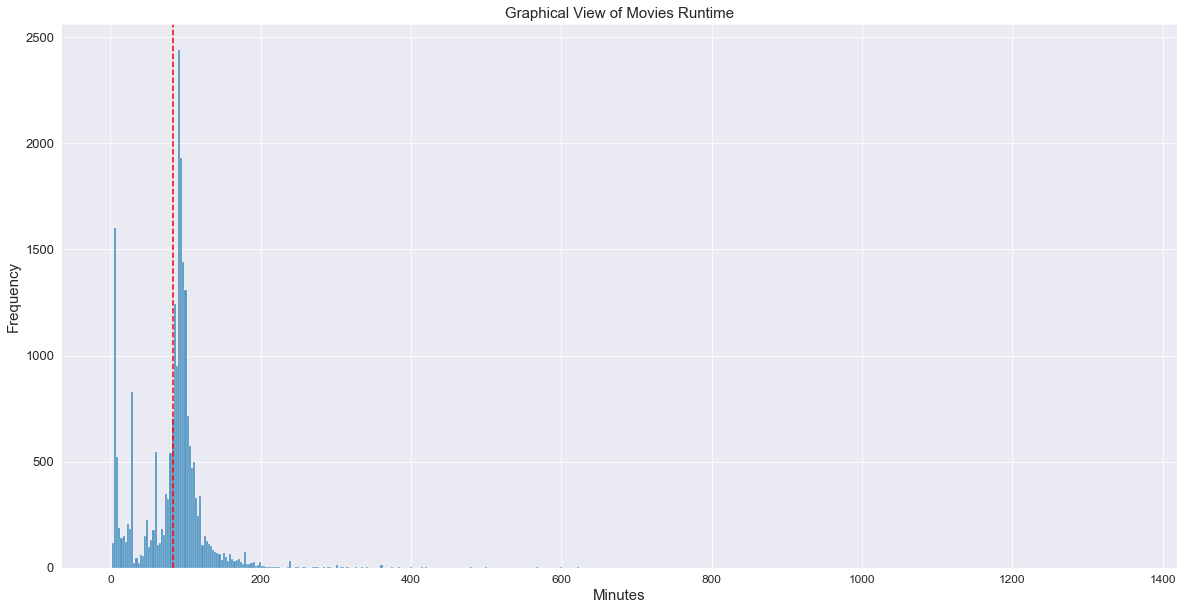

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(x='minutes', data=time)

mean_minutes = time['minutes'].mean()

# Add a vertical line at the mean value
plt.axvline(x=mean_minutes, color='r', linestyle='--')
plt.xticks(fontsize=12)
plt.yticks(fontsize=13)

plt.xlabel('Minutes',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title("Graphical View of Movies Runtime",fontsize=15)
plt.show()

#### Observation

The majority of the reviewed movies had a runtime ranging from 100 to 150 minutes, with the most common duration being 90 minutes. This trend is in line with the industry average of 117 minutes, as reported by [Statistica](https://www.statista.com/statistics/1292523/lenght-top-movies-us/#:~:text=In%202021%2C%20the%20average%20length,one%20hour%20and%2051%20minutes).


Additionally, there are some interesting outliers in the data, such as the movie with a length of only 2 minutes that was reviewed 18 times, and the movie with a length of 360 minutes that was reviewed 15 times. It would be interesting to investigate these outliers and determine what factors could have contributed to their popularity (or lack thereof).


----------------------

### _Movie runtime_

The length of a movie is often a subject of debate among filmmakers, critics, and audiences. While some argue that a longer runtime allows for a more immersive and engaging experience, others believe that shorter movies are more effective at holding the audience's attention. In this section, we will explore the relationship between movie runtime and ratings, using our dataset of reviewed movies to investigate whether there is a correlation between the two. By analyzing the data, we hope to gain insights into whether the length of a movie has any bearing on its critical reception.


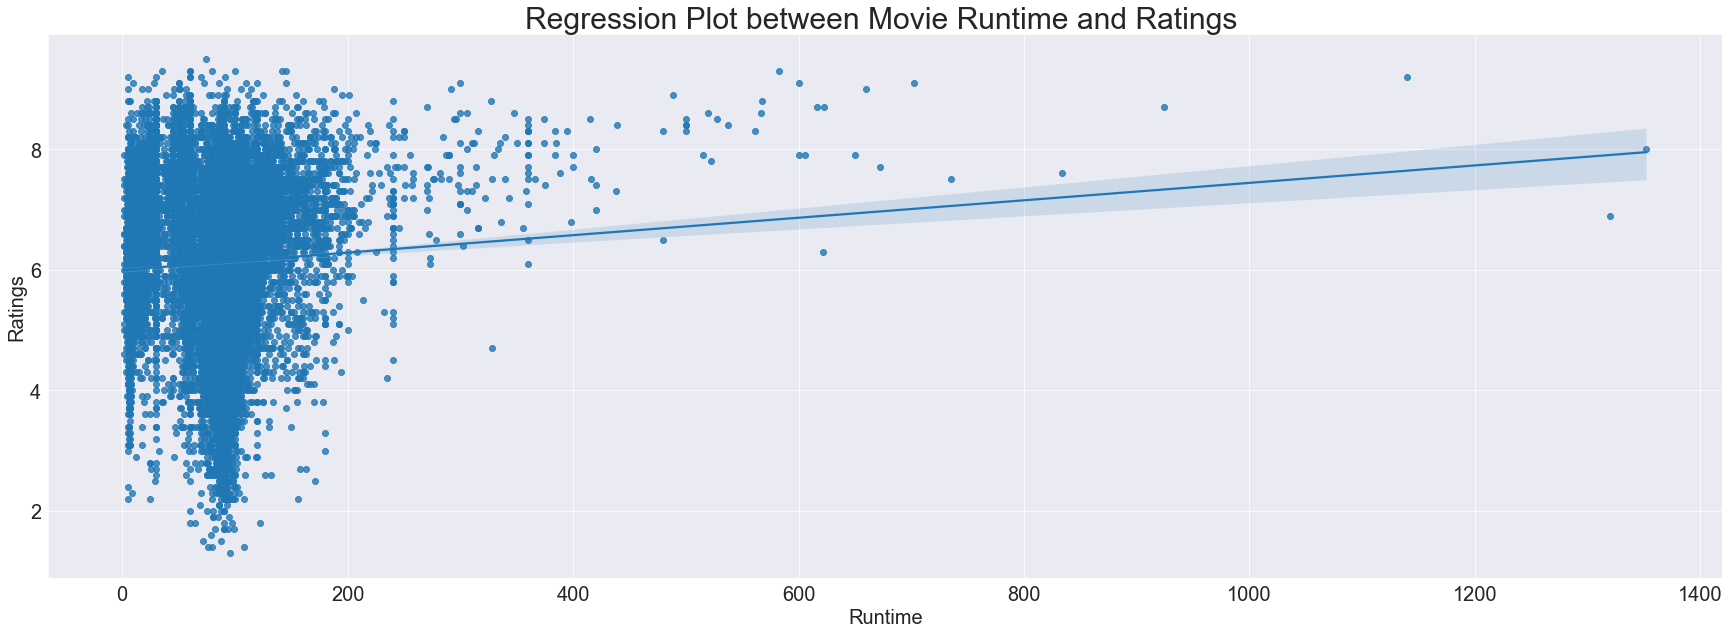

In [18]:
fig, ax = plt.subplots(figsize=(30,10))
sns.regplot(x='minutes', y='reviews', data=time)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('Runtime',fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title("Regression Plot between Movie Runtime and Ratings "
          ,fontsize=30)
plt.show()

In [19]:
corr_coef = time['minutes'].corr(time['reviews'])

print('The correlation coefficient between minutes and ratings is:', corr_coef)

The correlation coefficient between minutes and ratings is: 0.058221397311599185


#### Question
* What is the Correlation between Movie runtime and its rating?

> The correlation coefficient of runtime and ratings is 0.0582 which indicates a weak positive correlation between movie duration in minutes and ratings. This shows that as the movie duration increases, the ratings also tend to increase, but the relationship between the two variables is not very strong. It can further be seen in the graph above as the regression line leans slightly upwards indictaing longer runtime may be contribute to higher ratings.


> It's important to note that correlation does not necessarily imply causation, meaning that the increase in movie duration does not necessarily cause an increase in ratings. Other factors may also be influencing the ratings, such as the genre of the movie, the quality of acting, or the plot of the movie.

--------------------

### Years Reviews Were Taken

Understanding the distribution of movie reviews across different years can provide insights into broader trends in the film industry. For example, changes in the number of reviews over time might reflect shifts in audience preferences or changes in the volume of movies produced. In this section, we'll take a closer look at the years in which movie reviews were conducted, examining any notable patterns or changes over time. We'll also consider any external factors that might have influenced the number of reviews in a given year, such as major events or shifts in the film industry landscape. By exploring the data in this way, we can gain a more nuanced understanding of the movie review landscape and how it has evolved over time.

In [20]:
IMDB_reviewer = pd.read_csv('data\IMDB_dataset.csv')

In [21]:
date = pd.to_datetime(IMDB_reviewer['review date'], format='%d %B %Y')

In [22]:
year= date.dt.year
year = year.reset_index(drop=True)
year=year.value_counts().sort_index()

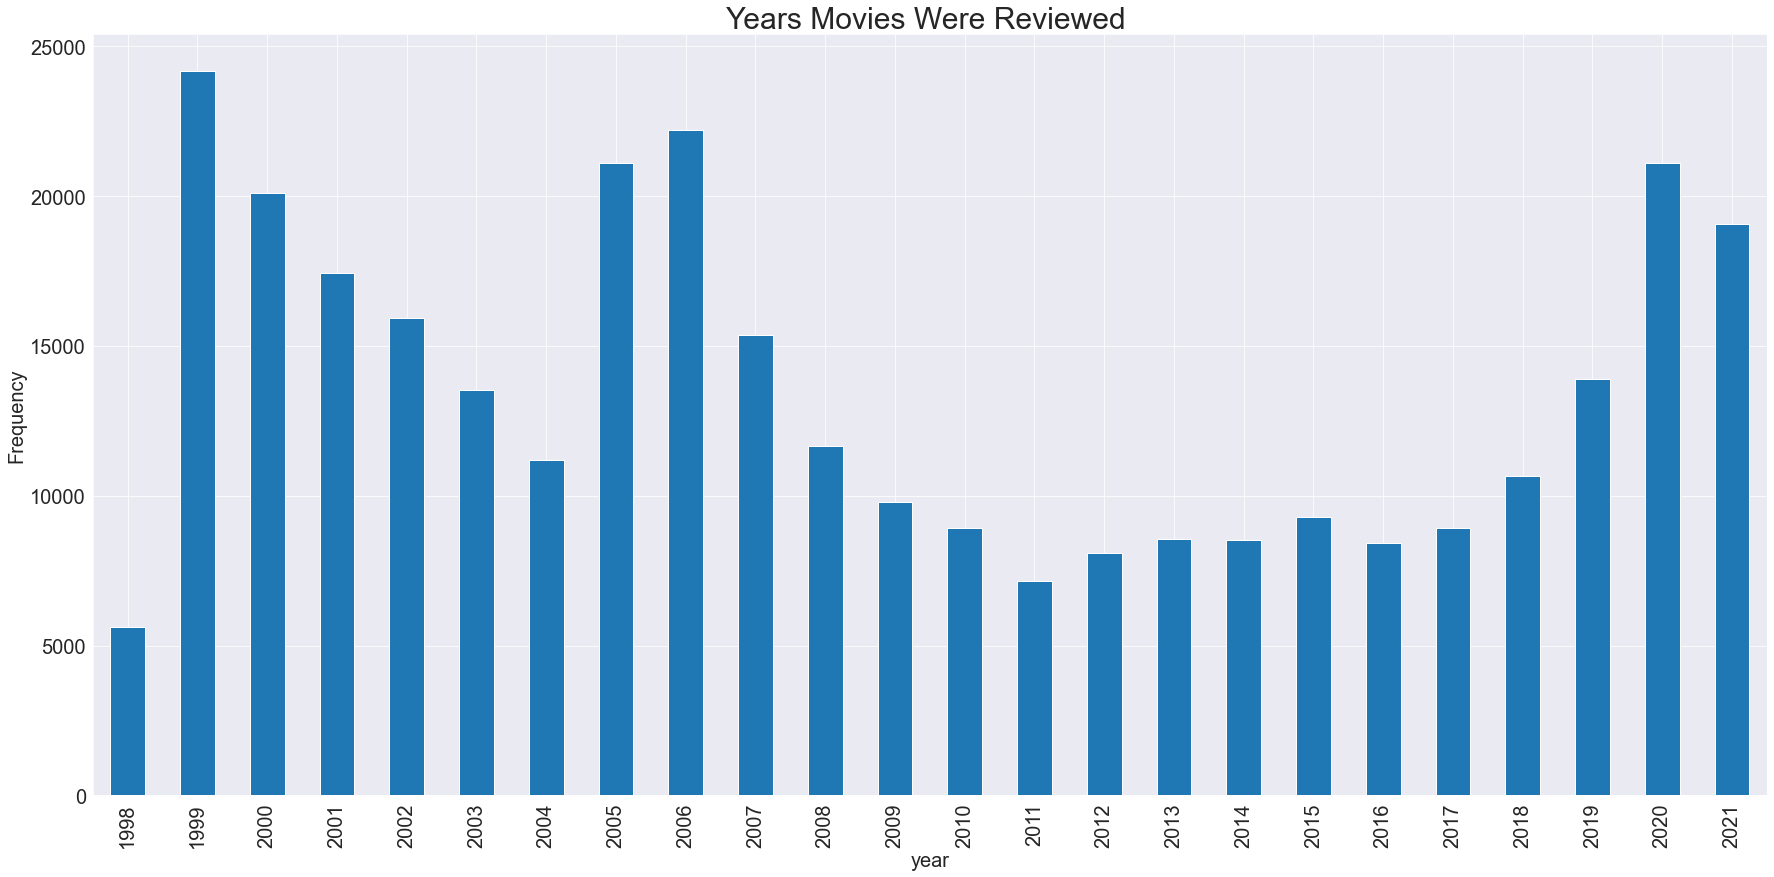

In [23]:
year.plot(kind='bar',figsize=(30,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel('year',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title("Years Movies Were Reviewed ",fontsize=30)
plt.show()

### Observation

* From the data, we can see that the number of movies reviewed per year has generally increased over time, with a few exceptions. 


* There was a significant increase from 1998 to 1999, with the number of movies reviewed jumping from 5,611 to 24,193. After that, there were fluctuations but the overall trend remained upwards with a peak in 2019 with 13,901 movies reviewed.


* We can also see that the number of movies reviewed in 2020 was the same as in 2005, which could be an anomaly due to the COVID-19 pandemic, and the number in 2021 decreased compared to the previous year, which could also be related to the pandemic.

Overall, the dataset provides a useful snapshot of the number of movies reviewed each year, but it is important to consider the limitations and biases of the data when drawing conclusions.

## Question

* #### _Are there any specific years with significant increases or decreases in the number of movies reviewed that can be attributed to external factors?_

> Yes, there are specific years with significant increases or decreases in the number of movies reviewed that can be attributed to external factors. For example, the sharp increase in the number of movies reviewed in 1999 could be attributed to the popularity of independent films that year, while the decrease in 2004 could be attributed to the decrease in the number of independent films that year. 

>The increase in 2020 could be attributed to the increase in the number of movies released on streaming platforms due to the COVID-19 pandemic. However, further analysis would be needed to confirm these assumptions.


* #### _Are there any biases or limitations in the dataset that could affect the accuracy of the results?_

> Yes, there could be several biases or limitations in the dataset that could affect the accuracy of the results. One limitation is that the dataset only includes the number of movies reviewed, and does not provide any information about the quality of those movies. It is possible that certain years had more highly acclaimed or controversial movies, which could have impacted the number of reviews.

> Another limitation is that the dataset only includes movies reviewed by a specific source(IMDB), which may not be representative of all movie reviews. Therefore, the trends observed in this dataset may not reflect the overall trends in the movie industry.

------------------------------------------------------

### Years Movies Were Produced

Understanding the distribution of movie production across different years is an important aspect of analyzing the film industry. It allows us to identify trends and patterns in the release of movies, and provides insights into the cultural, technological, and economic factors that influence the industry. In this section, we will take a closer look at the years in which movies were produced in our dataset and explore any interesting observations or trends that emerge

In [24]:
IMDB_review['Movie Date'].reset_index().loc[9319:9340]

,original title,Movie Date
9319,She Woke Up Pregnant,1996
9320,She's the One,1996
9321,Sherman Oaks,1995–1997
9322,Shine,1996
9323,A Short Film About Falling Down,1996
9324,The Shot,1996
9325,Showgirl Murders,1996
9326,Shyness,1996
9327,Si mian xia wa,1996
9328,Den sidste viking,1997


In [25]:
# We will need to clean the data because the data contained
# many values that pandas couldn't read as date time.
import re
date= IMDB_review['Movie Date'].reset_index()
cleaned_data = {}
for entry in date['Movie Date']:
    year = re.findall(r"\d{4}", entry)
    if len(year) == 1:
        cleaned_data[year[0]] = cleaned_data.get(year[0], 0) + 1
    elif len(year) == 2:
        cleaned_data[year[0]] = cleaned_data.get(year[0], 0) + 1
    elif len(year) == 0:
        cleaned_data["Unknown"] = cleaned_data.get("Unknown", 0) + 1
        
movie_dates_df = pd.DataFrame(list(cleaned_data.items()), 
                              columns=['Movie Date', 'Count'])

# drop rows where Movie Date is 'Unknown'
movie_dates_df = movie_dates_df[movie_dates_df['Movie Date'] != 'Unknown']

movie_dates_df.index=movie_dates_df['Movie Date']
movie_dates_df=movie_dates_df.drop(columns=['Movie Date'])
movie_dates_df=movie_dates_df['Count'].squeeze().sort_index()

Text(0.5, 1.0, 'Graphical View of Years Reviewed Movies Were Released')

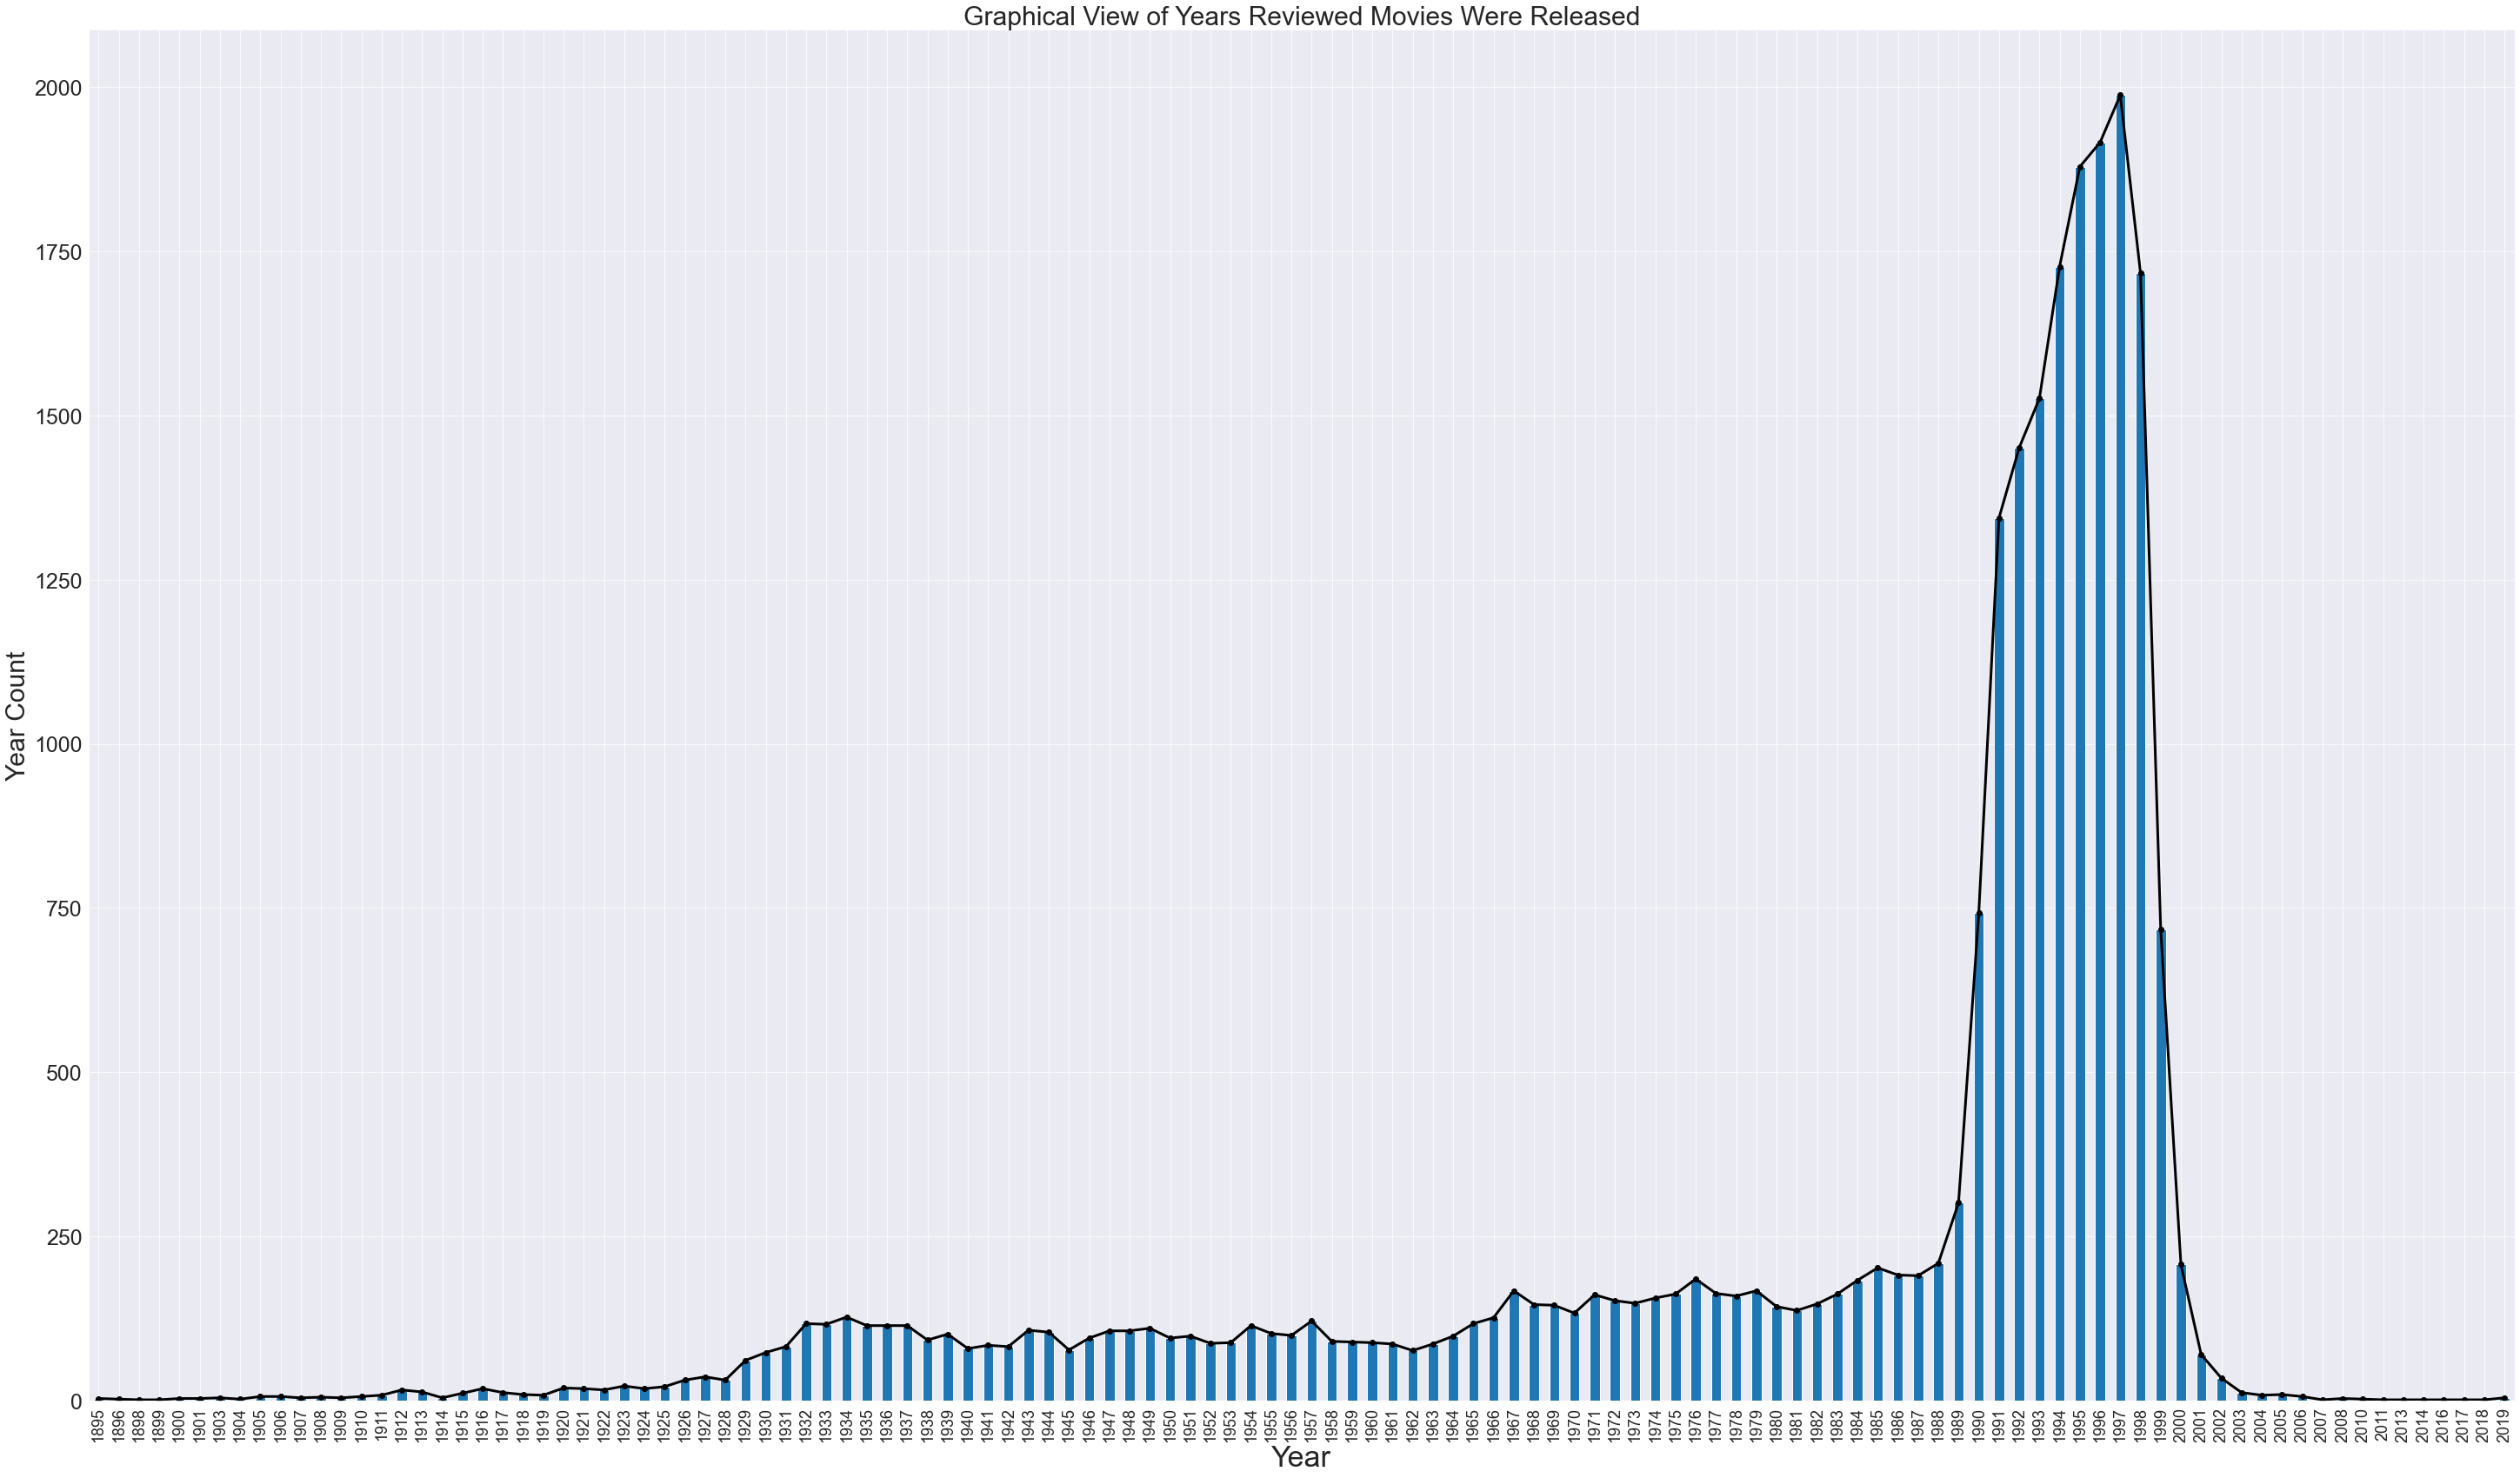

In [26]:
movie_dates_df.plot(kind='bar',figsize=(50,29))
movie_dates_df.plot(kind='line',figsize=(50,29), color='black'
                    , marker ='o', linewidth=3)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=25)

plt.xlabel('Year',fontsize=34)
plt.ylabel('Year Count',fontsize=30)
plt.title("Graphical View of Years Reviewed Movies Were Released"
          ,fontsize=30)

### Observations

* The number of reviewed movies produced per year started off very low, with only 3 movies produced in 1895 and 2 in 1896.

* The number of reviewed movies produced per year increased gradually over time, with some fluctuations and occasional dips.

* The highest number of reviewed movies produced in a single year was in 1994 with 1727 movies.

* This datasets contains  wide range of data with movies reviewed having a production year as early as 1895 to as recent as 2019

### Insights
> It is important to note that this dataset might be a bit biased because of most of the movies in this dataset were produced in the 90s. 

## Conclusion

Based on our analysis, we have found that there was a significant increase in the number of movies produced and reviewed from the 1990s onwards. However, the majority of the movies that were reviewed were produced in the 1990s. External evidences of this are seen in [this article](https://uk.movies.yahoo.com/greatest-year-movies-revealed-144315354.html)

Furthermore, we observed that the drama genre had the highest number of movies produced and reviewed. Despite having a high number of movies produced, only a small number of them had a bad rating. This could suggest that drama movies are generally well-received by audiences. 

On the other hand, Horror, Sci-Fi, Thriller, Comedy, Action and Mystery  genres had a larger proportion of movies with bad ratings compared to their overall production and review numbers. This could imply that audiences are more critical of these genres and their content. It's also plausible that those genres are evaluated more critically compared to other genres.


## Recommendation

As for recommendations, we suggest that movie producers and studios continue to explore and invest in the drama genre, while also taking audience feedback and criticism seriously to improve the quality of their productions. It may also be beneficial to consider the potential factors that could influence audience perception and reception of different genres, such as cultural and societal norms.

It is also recommended that more attention be given to the horror and sci-fi genres when producing movies. Since these genres have a higher proportion of low-rated movies, it is important to ensure that the quality of these movies is improved to match that of other genres.

Furthermore, since the ratings are from IMDb, it is important for movie producers to pay attention to the reviews and feedback from IMDb users to improve the quality of their movies. They can also use this feedback to identify areas of improvement and make necessary changes to future productions

While genre and production year were found to be important factors in ratings, other factors such as budget, cast, and director may also have an impact. It may be worthwhile to investigate these factors further to improve ratings.

Overall, this recommendation emphasizes the importance of producing quality movies in all genres and keeping up with the changing preferences of the audience to ensure that movies are well-received and rated highly.

## Closing Remarks

Our analysis of the dataset reveals interesting insights about movie ratings and their trends over time. While some genres tend to be rated higher than others, we also see that there may be biases in how horror and sci-fi movies are judged. We also found that the source of the ratings is from IMDb, which is an important factor to consider when interpreting the results.

Based on our analysis, we recommend that movie producers and studios take into account these trends and biases when creating and promoting their films. It is also important to consider the source of the ratings and the potential biases that may exist in these ratings.

Overall, we hope that this report provides valuable insights and recommendation